In [170]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

# Paths to training and validation datasets for each class
train_files_healthy = r"E:\LEAF\train_data\Healthy"
train_files_powdery = r"E:\LEAF\train_data\Powdery"
train_files_rust = r"E:\LEAF\train_data\Rust"

val_files_healthy = r"E:\LEAF\val_data\Healthy"
val_files_powdery = r"E:\LEAF\val_data\Powdery"
val_files_rust = r"E:\LEAF\val_data\Rust"

# Display file counts for training dataset
print("Number of healthy leaf images in training set:", total_files(train_files_healthy))
print("Number of powdery leaf images in training set:", total_files(train_files_powdery))
print("Number of rusty leaf images in training set:", total_files(train_files_rust))

print("========================================================")

# Display file counts for validation dataset
print("Number of healthy leaf images in validation set:", total_files(val_files_healthy))
print("Number of powdery leaf images in validation set:", total_files(val_files_powdery))
print("Number of rusty leaf images in validation set:", total_files(val_files_rust))


Number of healthy leaf images in training set: 50
Number of powdery leaf images in training set: 50
Number of rusty leaf images in training set: 50
Number of healthy leaf images in validation set: 31
Number of powdery leaf images in validation set: 28
Number of rusty leaf images in validation set: 31


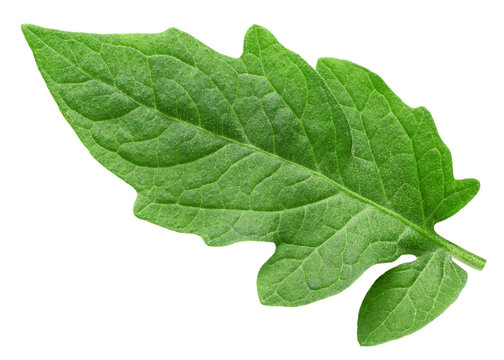

In [171]:
from PIL import Image
import IPython.display as display

image_path =(r"E:\LEAF\New folder\360_F_459345284_D1TPuMPy8Ps8mXuSgqnapTlslZR0BXqz.jpg")
with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [161]:
import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [150]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training data
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    r'E:\LEAF\train_data',            # Updated path for training data
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
validation_generator = test_datagen.flow_from_directory(
    r'E:\LEAF\val_data',              # Updated path for validation data
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)


Found 150 images belonging to 3 classes.


Found 90 images belonging to 3 classes.


In [162]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

c:\Users\Asrith\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [163]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Found 150 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


c:\Users\Asrith\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.2510 - loss: 9.3928 - val_accuracy: 0.3444 - val_loss: 2.3243
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3293 - loss: 2.2412 - val_accuracy: 0.3444 - val_loss: 1.2240
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3569 - loss: 1.1355 - val_accuracy: 0.8778 - val_loss: 1.0079
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7636 - loss: 0.9767 - val_accuracy: 0.8333 - val_loss: 0.7888
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8201 - loss: 0.7329 - val_accuracy: 0.8222 - val_loss: 0.6036
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6379 - loss: 0.8455 - val_accuracy: 0.7444 - val_loss: 0.6193
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8166 - loss: 0.5891 - val_accuracy: 0.9222 - val_loss: 0.4492
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9134 - loss: 0.4170 - val_accuracy: 0.9333 - val_loss: 0.2619
Epoch 9/

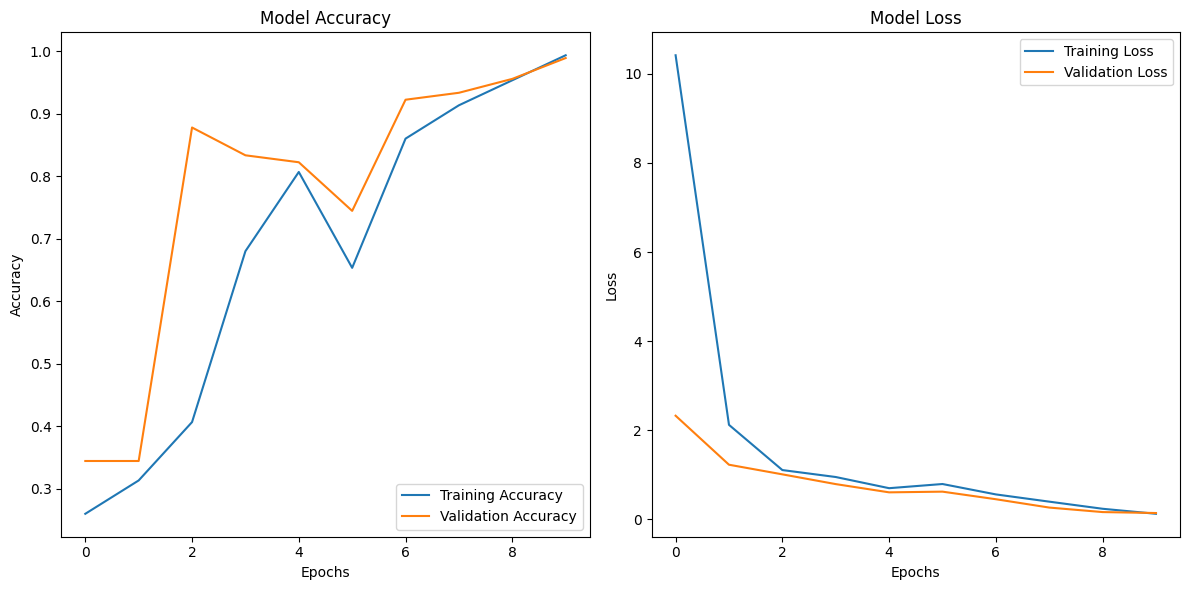

In [164]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define constants
BATCH_SIZE = 32
IMAGE_SIZE = (225, 225)
EPOCHS = 10  # Adjust as needed

# Data augmentation for training data
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    r'E:\LEAF\train_data',  # Updated path for training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load validation data
validation_generator = test_datagen.flow_from_directory(
    r'E:\LEAF\val_data',  # Updated path for validation data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Define a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')  # Number of classes based on training data
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with training data and validation data
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    verbose=1
)

# Optionally, save the model
model.save('leaf_disease_model.h5')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [165]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r"E:\LEAF\New folder\1000.jpg")


In [166]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([5.4659188e-01, 6.1423232e-12, 4.5340815e-01], dtype=float32)

In [168]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [169]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Healthy
